## 4.9.2.1 Import libraries & data
## 4.9.2.3 Histogram of the “order_hour_of_day” 
## 4.9.2.4 Bar chart from the “loyalty_flag”
## 4.9.2.5 Line chart for expenditure per hour of the day
## 4.9.2.6 Customer demographics analysis
## 4.9.2.7 Scatter plot for age & income

## 4.9.2.1 Import libraries & data

In [1]:
# installing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# import data
path = r'C:\Users\darii\Documents\10-2023 Instacart Basket Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs.pkl'))

In [5]:
df.shape

(32404859, 34)

## 4.9.2.3 Histogram of the “order_hour_of_day” 

In [6]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_spend', 'spender_flag', 'median_days_since_prior_order',
       'order_frequency_flag', 'name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'status', 'income', '_merge'],
      dtype='object')

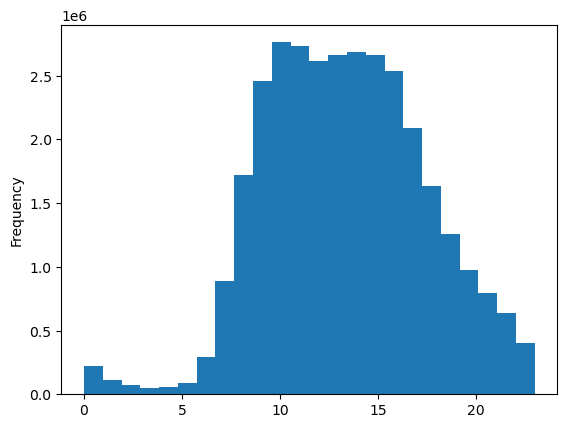

In [19]:
# histogram
hist_ohod=df['order_hour_of_day'].plot.hist(bins=24)

##### most orders are coming from 9am to 4pm, the less - at night (1 to 5 am)

In [20]:
hist_ohod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_ohod.png'))

## 4.9.2.4 Bar chart from the “loyalty_flag”

In [17]:
df_loy=df.groupby(['loyalty_flag']).user_id.nunique()

In [25]:
df_loy.head(5)

loyalty_flag
Loyal customer       17017
New customer        112328
Regular customer     76864
Name: user_id, dtype: int64

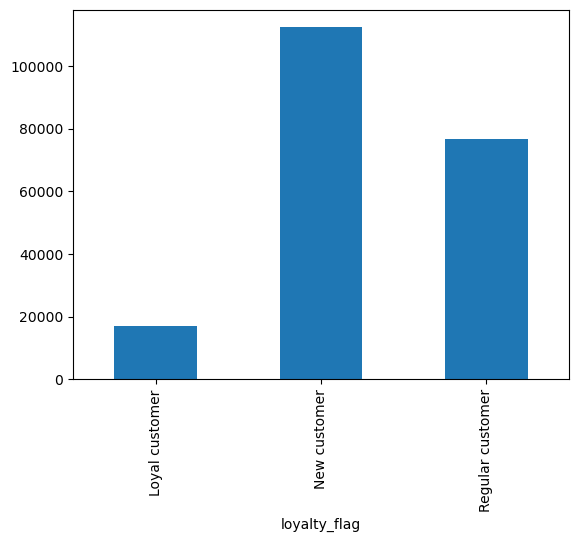

In [30]:
bar_loyalty=df_loy.plot.bar()

In [31]:
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

## 4.9.2.5 Line chart for expenditure per hour of the day

##### Sampling data

In [33]:
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [34]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [35]:
# 70% data
big = df[dev]

In [36]:
# 30% data
small = df[~dev]

In [37]:
# check
len(df)

32404859

In [38]:
len(big) + len(small)

32404859

In [40]:
# reducing columns to only necessary
df_2 = small[['order_hour_of_day','prices']]

##### line chart

C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

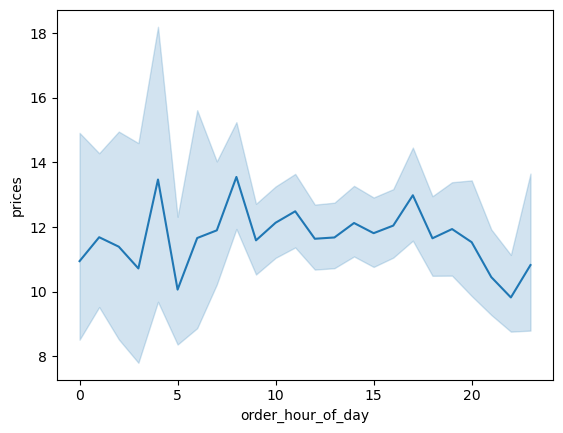

In [42]:
line_price_ohod= sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

##### Customers tend to buy expensive products at 4am (after-party spontanious shopping?), at 9am (for a breakfast) and 6pm (for a dinner)

In [43]:
line_price_ohod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_ohod.png'))

## 4.9.2.6 Customer demographics analysis

In [44]:
df_3 = small[['age', 'n_dependants']]

C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

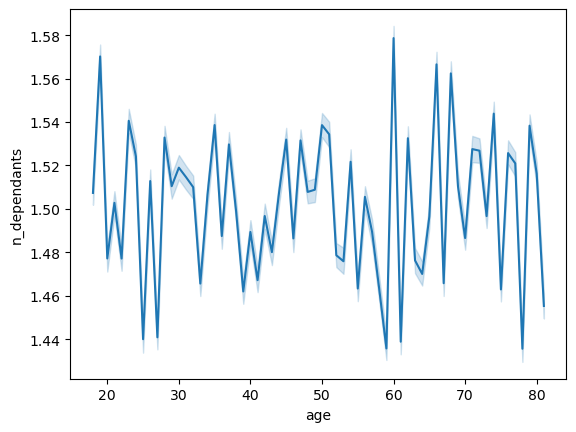

In [45]:
line_age_dependents = sns.lineplot(data = df_3, x = 'age', y = 'n_dependants')

##### no dependency between age and number of dependants

In [46]:
line_age_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependents.png'))

## 4.9.2.7 Scatter plot for age & income

In [47]:
df_4 = small[['age', 'income']]

C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


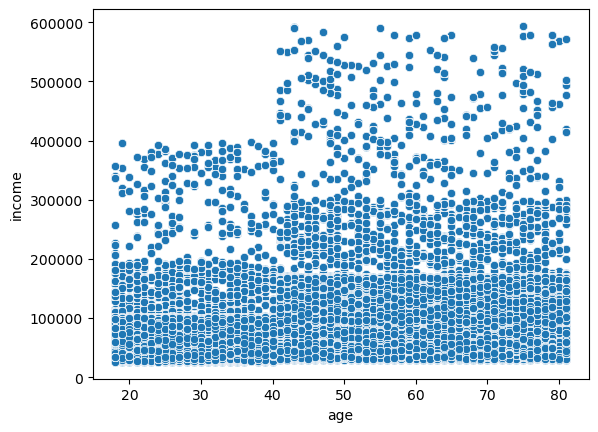

In [48]:
scatter_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_4)

##### most of the customers of each age have record income up to 200000. Interesting difference between customers under and over 40: the first group includes people earning up to 400000 and the second group up to 600000 (with more representatives in the 200000-300000 income)

In [49]:
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))